# The Rise and Fall of The Beatles Through Song
**Benjamin Jenkyn 100622689**

## Can the breakup of the Beatles be seen through their songs?
The Beatles, one of the most influential bands in the history of music, have left an indelible mark on the world with their innovative sound and timeless songs. From their early days in Liverpool to their meteoric rise to global fame, the band's journey is a fascinating story of creativity, collaboration, and eventual dissolution. This project aims to explore the rise and fall of The Beatles through an analysis of their songs, seeking to understand if the band's breakup can be seen through the evolution of their songs and songwriting.

The primary data source for this project is a comprehensive dataset of Beatles songs, which includes detailed information about each track. This dataset was sourced from Kaggle, and it stood out to me since I recently took an interest in the Beatles as I found their story to be interesting.

Given the information available in the dataset, several questions emerged as interesting avenues for exploration. One key question is whether the internal dynamics and eventual breakup of The Beatles can be traced through changes in their songwriting patterns, musical styles, and lyrical themes. By analyzing the data, we can investigate trends such as the proportion of cover songs versus original compositions, the distribution of songwriting credits among band members, and the evolution of musical genres and moods over time.

This project will employ various data analysis techniques to uncover patterns and insights from the dataset. Visualizations will be used to illustrate key trends and changes in the band's music, providing a clear and engaging way to understand the data. Ultimately, this analysis aims to shed light on how The Beatles' music evolved throughout their career and whether the signs of their breakup can be detected in their songs.

>The above intro was written in part by the GitHub Copilot chat (which uses GPT4-0 under the hood) and then edited by me. The prompt was:
>
>Can you help write an introduction for this project? The question I'm looking to explore is can the rise and fall of the Beatles be seen through their music? Looking at the project, provide the reader with some background on the question and data. Make sure it's between 150-500 words.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

beatles_songs = pd.read_csv('./beatles_song_database.csv')

## Data Cleanup
This section is mainly cleaning up the data from the CSV file as the datatypes were not correct or the data was not in the correct format. As it was stored in a csv file many of the columns were stored as strings and needed to be converted to the correct data type. There were also issues with the "Year" column as some years would be written as "1997/1998" which I removed as these dates were outside of the range of the Beatles career.

In [2]:
# Many of the columns in the dataframe were imported as strings due to how they were written in the CSV file. Here I am converting them to the correct data types.

# Prompt: "beatles_songs["Moods"] contains a series of strings. How can I split the string into an array of strings?"
beatles_songs["Moods"] = beatles_songs["Moods"].str.split()

beatles_songs["Genre"] = beatles_songs["Genre"].str.split(', ')
beatles_songs = beatles_songs[beatles_songs["Year"].notna()]

# Prompt: right now the "Year" series is a list of strings. I want to be able to convert it to a list of ints and remove the strings which cannot be changed into ints
beatles_songs["Year"] = pd.to_numeric(beatles_songs["Year"], errors='coerce').dropna().astype("Int16")

# The values in the "Cover" column were either "Y" or NaN which is messy so I replaced them with boolean values
beatles_songs["Cover"] = beatles_songs["Cover"].replace(np.nan, False).replace("Y", True)

## The Early Years (1956-1962)
![The Beatles With Pete Best](https://www.irishtimes.com/resizer/v2/ZRIFUMPMOWGRLMEXM5VENYWZF4.jpg?auth=f561ac019a9114abd31afe8f8971972953fbdf8ed666ccaadca2b7f1ab553473&smart=true&width=480&height=270)
[source](https://www.irishtimes.com/culture/music/there-s-nothing-to-forgive-pete-best-on-being-sacked-from-the-beatles-1.4199732)

During the early years of the band when they were just getting started, they performed a lot of covers as they were just starting and hadn't yet developed their own sound. In 1962 Ringo would join the band and they would release their first single "Love Me Do" the following year which would be the start of their rise to fame.

### Analysis
By grouping the songs by year we can see how the band's sound evolved over time and how they transitioned from performing covers to writing their own songs. This can be seen in the following visualizations which include a table that compares the number of cover songs released compared to the number of songs total. The percentage was then better visualized in a bar plot.

In [3]:
beatles_songs_year_groupby = beatles_songs.groupby("Year")
cover_songs_per_year = beatles_songs_year_groupby["Cover"].sum()
songs_per_year = beatles_songs_year_groupby["Title"].count()
cover_songs_per_year = cover_songs_per_year.rename("Cover Songs")
songs_per_year = songs_per_year.rename("Songs")
percentage_cover_songs_per_year = np.round(cover_songs_per_year / songs_per_year * 100, 1)
percentage_cover_songs_per_year.name = "Percentage Of Cover Songs Per Year"
cover_songs_data = pd.concat([cover_songs_per_year, songs_per_year, percentage_cover_songs_per_year], axis=1)
cover_songs_data

,Cover Songs,Songs,Percentage Of Cover Songs Per Year
Year,,,
1958,1,2,50.0
1960,0,3,0.0
1961,1,3,33.3
1962,3,9,33.3
1963,41,61,67.2
1964,13,38,34.2
1965,3,36,8.3
1966,0,19,0.0
1967,0,25,0.0


/var/folders/c2/pz90dsn53hzb8fnld7dh2pcw0000gn/T/ipykernel_54240/3814334512.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cover_songs_barplot.set_yticklabels([f"{int(y)}%" for y in cover_songs_barplot.get_yticks()])


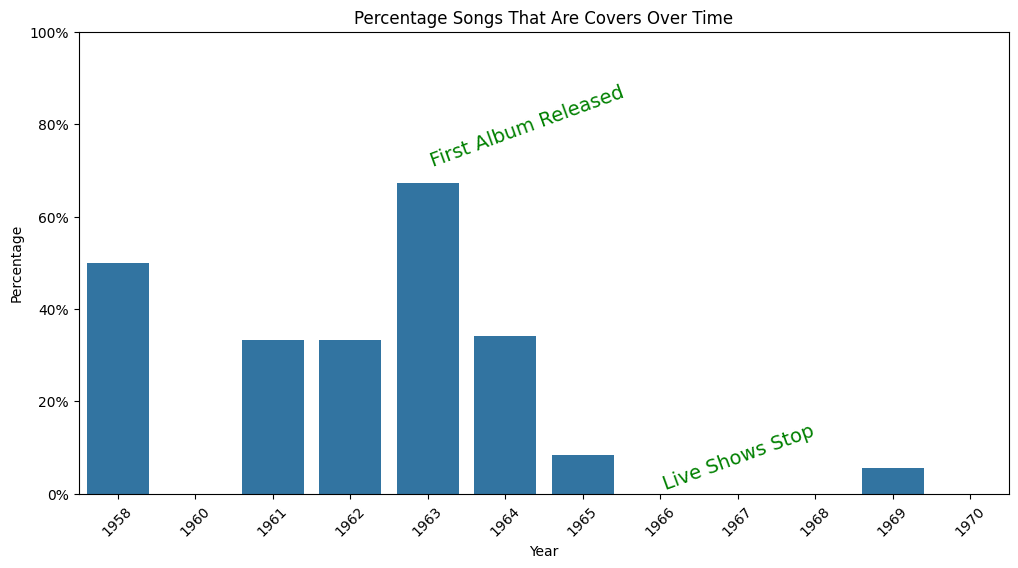

In [4]:
cover_songs_barplot = sns.barplot(x=cover_songs_data.index, y=cover_songs_data["Percentage Of Cover Songs Per Year"])
cover_songs_barplot.set(ylim=(0, 100))
cover_songs_barplot.set_ylabel("Percentage")
plt.xticks(ticks=range(len(cover_songs_data.index)), labels=cover_songs_data.index, rotation=45)
# Prompt: Set the y ticks to percentages
cover_songs_barplot.set_yticklabels([f"{int(y)}%" for y in cover_songs_barplot.get_yticks()])

plt.text(4, 70, "First Album Released", ha='left', va='bottom', fontsize=14, color='green', rotation=20)
plt.text(7, 0, "Live Shows Stop", ha='left', va='bottom', fontsize=14, color='green', rotation=20)
plt.title("Percentage Songs That Are Covers Over Time")
plt.gcf().set_size_inches(12, 6)
plt.show()

### The Early Years End
The early years saw the Beatles doing a lot of live shows and cover songs while trying to break through and find their sound. The end of the early years can be seen through the release of their first album "Please Please Me" in 1963. This album was the start of the beatlemania that would follow the band for the rest of their career. After the first album was released you can see the band start to write more of their own songs and start to find their own sound.

## Beatlemania (1963-1966)
<a title="United Press International, photographer unknown, Public domain, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:The_Beatles_arrive_at_JFK_Airport.jpg"><img width="512" alt="The Beatles wave to fans after disembarking a plane at Kennedy Airport." src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/61/The_Beatles_arrive_at_JFK_Airport.jpg/512px-The_Beatles_arrive_at_JFK_Airport.jpg?20240427190833"></a>
<a href="https://commons.wikimedia.org/wiki/File:The_Beatles_arrive_at_JFK_Airport.jpg">United Press International, photographer unknown</a>, Public domain, via Wikimedia Commons

By 1963 the Beatles had released their first album and were starting to gain popularity in the UK. The following year they would release their second album "With The Beatles" which would be the start of their rise to fame in the US. In 1964 the Beatles would tour the US and appear on the Ed Sullivan show which would be the start of Beatlemania. As the band's popularity grew they began to experiment with new sounds and styles, eventually including psychedelic elements in their music. Beatlemania ended when the band stopped touring in 1966 due to the stress and the fact that they couldn't hear themselves play over the screaming fans.

### Analysis

For this section I wanted to highlight the move away from the traditional rock and roll music that happened over the course of their career. I decided to do this by using a stacked bar chart that would show the change in the genre of their songs over time. I decided to take the top 5 genres per year as I figured any more would just lead to clutter and any less would not show the full picture.

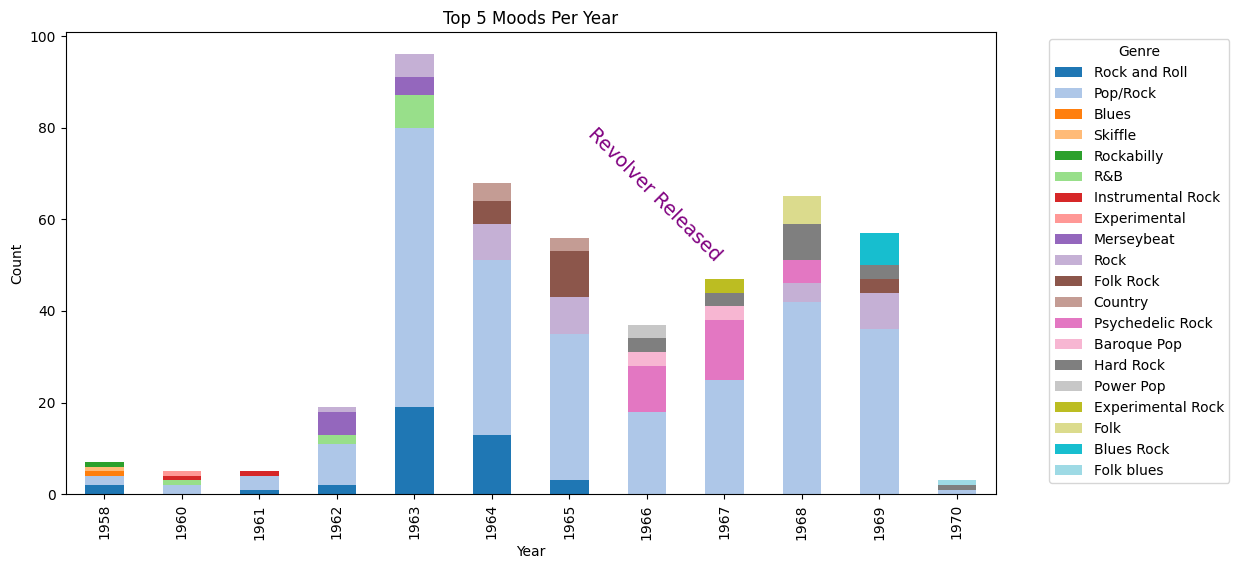

In [5]:
moods_by_year = beatles_songs.explode("Genre").groupby("Year")["Genre"]
top_moods_per_year = moods_by_year.value_counts().groupby(level=0).head(5)
# Prompt: Create a stacked bar chart and make each bar a different color
top_moods_per_year.unstack().plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

plt.title("Top 5 Moods Per Year")
plt.ylabel("Count")
plt.xlabel("Year")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.text(8, 50, "Revolver Released", ha='right', va='bottom', fontsize=14, color='purple', rotation=-45)
plt.show()

### The End of Beatlemania
The Beatles began their career mainly by performing Pop/Rock songs like those that were popular at the time, but as they grew as a band they started to experiment with different sounds and styles. As Beatlemania began to end the band started to experiment with different sounds and styles. As the band started experimenting with psychedelic drugs their music started to change as well. This can be seen in the album "Revolver" which was released in 1966. This album was a turning point for the band as they started to experiment with different sounds and styles.

## The Studio Years (1967-1970)
![The image shows Sgt. Pepper's inner gatefold photograph.](https://upload.wikimedia.org/wikipedia/en/4/44/Sgtpeppergatefold.jpg)
[source](https://en.wikipedia.org/wiki/File:Sgtpeppergatefold.jpg)

During this period the band had stopped touring and focused mainly on working in the studio. This period saw the release of some of the band's most famous albums such as "Sgt. Pepper's Lonely Hearts Club Band" and "The White Album". While this period saw the band at their most creative, the band was also starting to drift apart at this time and the band members were starting to work on their own projects and write songs more as individuals than as a band. This only worsened as the band's manager Brian Epstein died in 1967 as he was known to be the glue that held them together. On top of this, up until this point the main songwriters for the band had been John Lennon and Paul McCartney but George Harrison was starting to write more of his own songs and was starting to feel left out which widened the rift between the band members.

### Analysis

For this section I wanted to highlight the change in the band's songwriting credits over time. I decided to do this by using a line graph which I think best visualizes the decline in collaborative songwritting, as well as how George Harrison started to gain more confidence as a songwriter as the band's career went on. I also wanted to highlight key events such with the dashed vertical lines so the reader can see where are starting to change. 

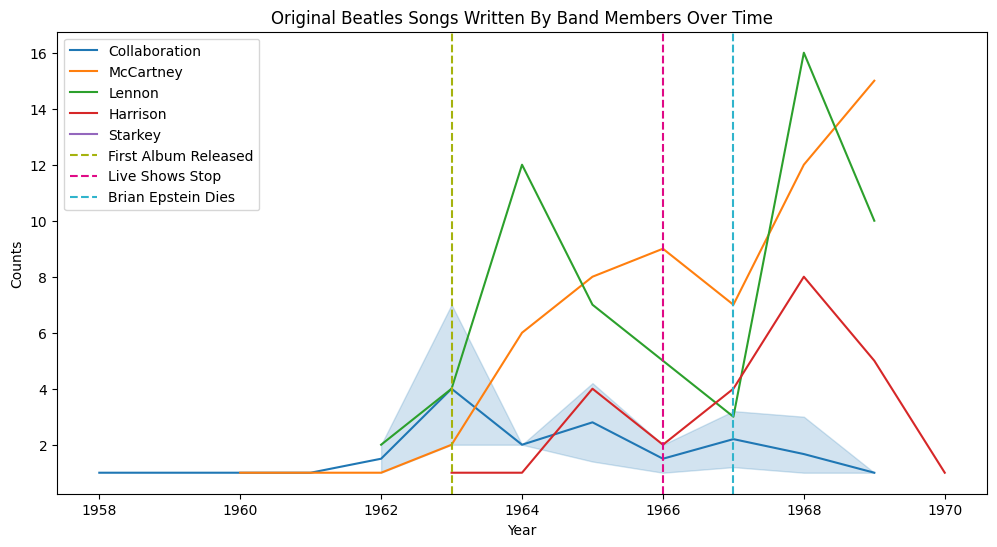

In [6]:
original_beatles_songs = beatles_songs[beatles_songs["Cover"] == False]
songwriters_by_year = original_beatles_songs.groupby(["Year", "Songwriter(s)"]).size().reset_index(name="Counts")
# Prompt: "Filter the songwriters to include only those containing Lennon, McCartney, Harrison, or Starkey"
# Filter the songwriters to include only those containing Lennon, McCartney, Harrison, or Starkey
songwriters_by_year = songwriters_by_year[
    songwriters_by_year["Songwriter(s)"].str.contains(
        "Lennon|McCartney|Harrison|Starkey"
    )
]
# Prompt: in the Songwriter(s) column only any string where the songwriter isn't just "Lennon" "McCartney" "Harrison" or "Starkey" (for example if the string is Lennon and McCartney) change it to say "Collaboration"
songwriters_by_year["Songwriter(s)"] = songwriters_by_year["Songwriter(s)"].apply(
    lambda x: (
        x if x in ["Lennon", "McCartney", "Harrison", "Starkey"] else "Collaboration"
    )
)
sns.lineplot(data=songwriters_by_year, x="Year", y="Counts", hue="Songwriter(s)")

# Prompt: "Add a vertical line at 1963 to indicate the year of the first album release"
plt.axvline(x=1963, color='#a5b30e', linestyle='--', label='First Album Released')

plt.axvline(x=1966, color='#E00A86', linestyle='--', label='Live Shows Stop')
plt.axvline(x=1967, color='#30B4CC', linestyle='--', label='Brian Epstein Dies')
plt.title("Original Beatles Songs Written By Band Members Over Time")
plt.legend()
plt.gcf().set_size_inches(12, 6)
plt.show()

### The End of The Beatles
The graph above shows the decline of Beatles collaboration overtime and the rise of individually written songs. This can be seen as the band started to fall apart and the members started to write their own songs. The band was no longer working together as a group and this can be seen in the data. One of the other key points of the breakup was George Harision growing as a songwriter yet feeling like he was not being taken seriously. We can see from the data that the number of songs written by George Harrison increased over time until the band broke up.

## Conclusion
The Beatles were one of the most influential bands of all time and their music has stood the test of time and the changes that the Beatles went through is reflected in their music. From using cover songs to writing their own genre-defining music the Beatles changed the music industry forever. In the end, each member of the band began to write their own songs and the band broke up in 1970. The Beatles will always be remembered as one of the greatest bands of all time, and their music will continue to be listened to for generations to come.

## References

### CSV File Source
- https://www.kaggle.com/datasets/devedzic/the-beatles-songs-

### Beatles Data Sources
- https://faroutmagazine.co.uk/timeline-of-the-beatles-split/
- https://www.historic-newspapers.co.uk/blog/beatles-timeline/
- https://thehistoryofrockandroll.net/the-beatles/

### LLM's
Any prompts I used for the project I commented in the cells that I used them in above the code that I generated with them. I mainly used GitHub Copilot for these prompts but also occasionally used ChatGPT. GitHub Copilot Auto-Completed code was also used during this project but as discussed with the proffessor I could not include the prompts for those as there were none.
- ChatGPT: https://chat.openai.com/
- GitHub Copilot: https://copilot.github.com/
